In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from datasist.structdata import detect_outliers
from sklearn.linear_model import LinearRegression
import joblib

In [3]:
! pip install 

ERROR: You must give at least one requirement to install (see "pip help install")


In [2]:
df=pd.read_csv('Ecommerce Customers.csv')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
df.drop(['Email', 'Address', 'Avatar'],axis=1,inplace=True)
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [6]:
df.drop_duplicates(inplace=True)

In [8]:
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [9]:
indexs=detect_outliers(df,0,df.columns)

In [13]:
len(indexs)/df.shape[0]

0.048

In [15]:
df.drop(indexs,axis=0,inplace=True)

In [16]:
import seaborn as sns

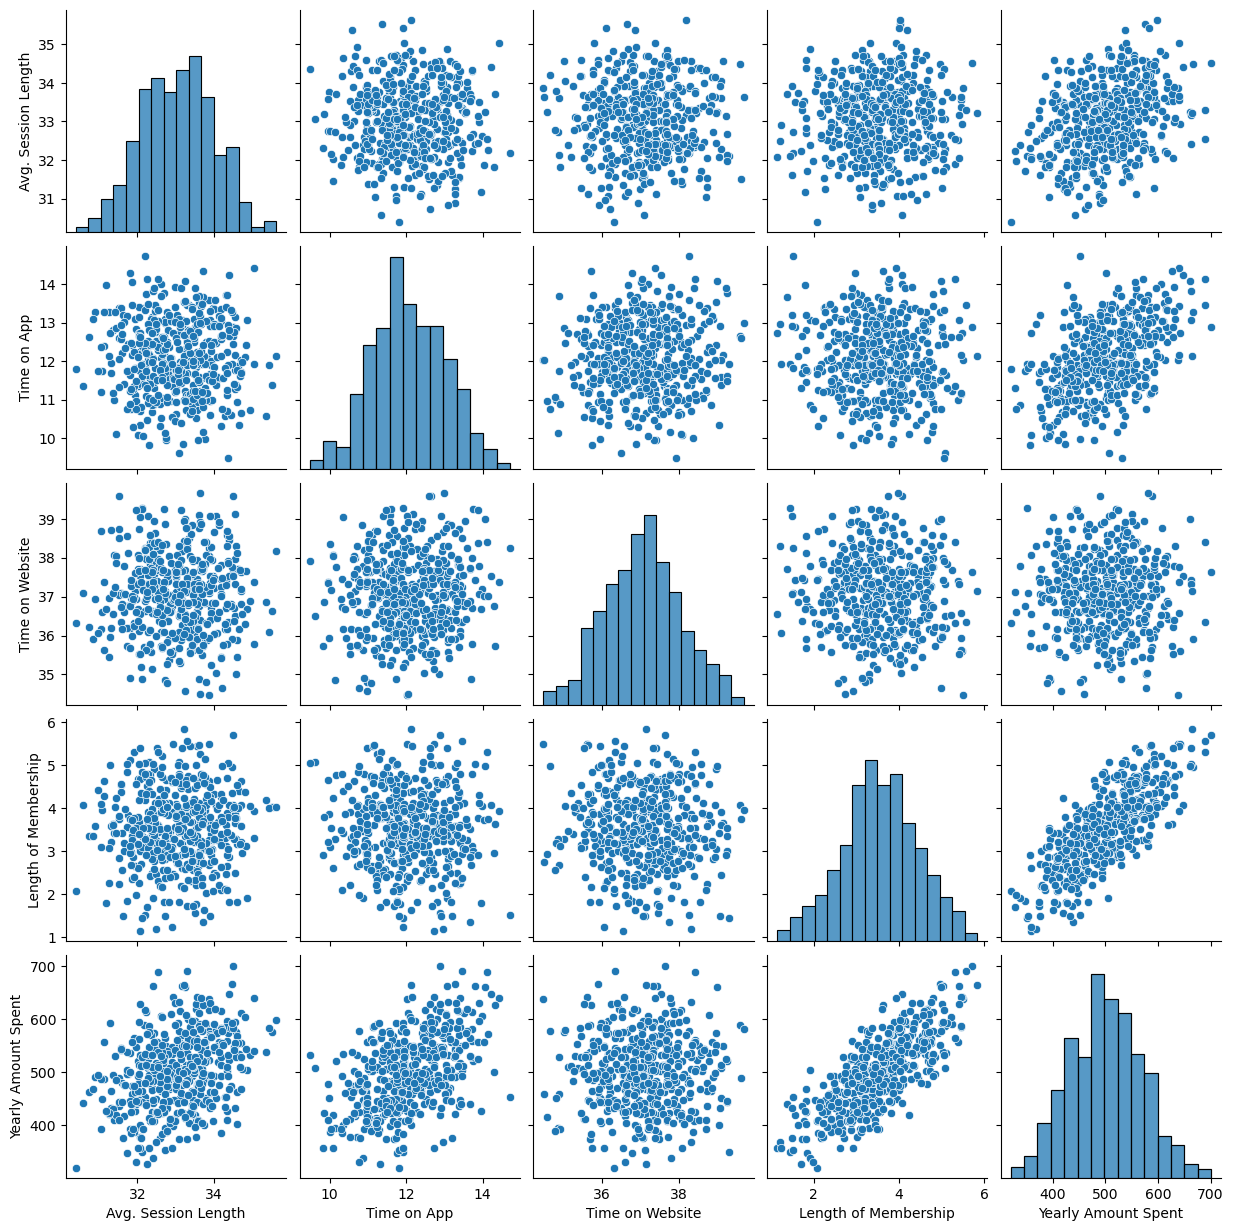

In [17]:
sns.pairplot(df)

In [21]:
x=df.drop('Yearly Amount Spent',axis=1)
x

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [22]:
y=df['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 476, dtype: float64

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
270,34.006489,12.956277,38.655095,3.275734
385,33.236266,10.972554,34.574028,2.931620
91,33.616019,13.516284,36.773123,4.125584
412,33.863189,11.523523,35.938045,3.013033
393,32.319858,12.418113,36.155336,3.222081
...,...,...,...,...
104,31.389585,10.994224,38.074452,3.428860
126,32.657269,11.957923,36.634652,4.106055
77,33.142079,11.433380,35.892432,4.470283
96,33.790387,11.942341,38.063414,4.081803


In [24]:
y_train

277    616.660286
253    503.387887
454    432.481169
439    565.994363
376    483.796522
          ...    
100    518.064558
469    427.356531
405    508.735741
414    532.724805
349    443.197221
Name: Yearly Amount Spent, Length: 380, dtype: float64

In [25]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [26]:
model=LinearRegression()


In [27]:
#Training Step
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_predict=model.predict(x_test)

In [29]:
model.score(x_train,y_train)

0.97922256522281

In [30]:
#testing
model.score(x_test,y_test)

0.979660457924441

In [32]:
import joblib

In [37]:
features=list(x.columns)
features

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership']

In [45]:
x.values[0]

array([34.49726773, 12.65565115, 39.57766802,  4.08262063])

In [38]:
joblib.dump(model,'model.h5')
joblib.dump(features,'features.h5')
joblib.dump(scaler,'scaler.h5')

['scaler.h5']

In [48]:
pred=model.predict(scaler.transform([[44.49726773, 15.65565115, 43.57766802,  3.08262063]]))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
pred[0]

911.2721513225742

In [51]:
model_=joblib.load('model.h5')
features_=joblib.load('features.h5')
scaler_=joblib.load('scaler.h5')

In [52]:
features_

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership']

In [53]:
pred=model_.predict(scaler_.transform([[44.49726773, 15.65565115, 43.57766802,  3.08262063]]))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [55]:
pred[0]

911.2721513225742

In [56]:
model.coef_

array([24.62155056, 37.24310389,  0.3125676 , 55.96908831])

In [57]:
model.intercept_

498.3945623257601

In [60]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
poly=PolynomialFeatures(degree=2)

In [62]:
x_train=poly.fit_transform(x_train)
x_test=poly.fit_transform(x_test)

In [63]:
x_train[0]

array([ 1.        , -0.89190459,  1.33749294, -0.16986562,  1.68490485,
        0.7954938 , -1.1929161 ,  0.15150393, -1.50277437,  1.78888737,
       -0.22719407,  2.25354834,  0.02885433, -0.28620741,  2.83890435])

In [64]:
x_test[0]

array([1.        , 0.13947162, 1.07795853, 0.2686476 , 2.07727079,
       0.01945233, 0.15034462, 0.03746872, 0.28972032, 1.16199459,
       0.28959098, 2.23921175, 0.07217154, 0.55805382, 4.31505391])

In [65]:
model.fit(x_train,y_train)


LinearRegression()

In [66]:
model.score(x_train,y_train)

0.9797486467371245

In [67]:
model.score(x_test,y_test)

0.9784771217876242

In [68]:
model.coef_

array([ 0.00000000e+00,  2.47012383e+01,  3.73811987e+01,  1.98263939e-01,
        5.60549453e+01, -4.34466053e-01, -1.21392447e-01, -4.10444431e-02,
        1.17422562e-01,  4.54381674e-01, -9.62750924e-01, -6.99196386e-03,
        3.54961792e-01, -9.38297442e-01,  4.50309406e-01])

In [69]:
model.intercept_

497.60487183383674

In [70]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [71]:
model=Ridge()

In [72]:
model.fit(x_train,y_train)

Ridge()

In [73]:
model.score(x_test,y_test)

0.9786977526855586